### Unsupervised Learning
* There is no target information
* All we do is find relationship between data
* No easy way to verify if you have a good modeling or not
* Clustering is a type of unsupervised learning
### Clustering
* Find similar data & cluster/group them together
* Types of cluster - Partitioning & Hierarchial
### Partitioning based Clustering
* Find clusters connected to same centroid
* For n Points what will be the centroid
* (xn+ ... + x2+x1)/n, (yn + ... +y2+y1)/n

### Kmeans Algorithm
Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.
### The way kmeans algorithm works is as follows:
* Specify number of clusters K.
* Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
* Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
* Compute the sum of the squared distance between data points and all centroids.
* Assign each data point to the closest cluster (centroid).
* Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

### Agenda
Implementing KMeans

### Steps in KMeans
* Randomy assign centroids
* Assign data to nearest centroids
* Recalculate the centroid
* Repeat above two steps

In [3]:
# importing dataset
from sklearn.datasets import load_iris

In [4]:
iris  = load_iris()

In [6]:
feture_data = iris.data

In [7]:
feture_data.shape

(150, 4)

In [13]:
feature_data = feture_data[:,[0,1]]

In [14]:
feature_data.shape

(150, 2)

In [15]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

 ### Cluster feature_data into 3 classes

In [16]:
import numpy as np
import pandas as pd

In [104]:
class MyKMeans:
    def __init__(self,n_clusters =3):
        self.n_clusters = n_clusters
        
    def my_fit(self,feature_data,centroids =[[4.8,3.2],[5.5,2.5],[7.5,3]]):
        self.feature_data = np.array(feature_data)
        self.data_centroid = []
        self.centroids = np.array(centroids)
        
    def assign_data_to_centroid(self):
        fd = self.feature_data.reshape(150,1,2)
        cd = self.centroids.reshape(1,3,2)
        distances = np.sqrt(np.sum(np.square(fd - cd),axis=2))
        self.data_centroid = np.argmin(distances,axis=1)
        self.distance_centroid = np.min(distances,axis=1)
        return self.data_centroid
    
    def recalculate_centroid(self):
        def f(d):
            res = np.round([d['F1'].sum()/d.shape[0],d['F2'].sum()/d.shape[0]],3)
            self.centroids.append(np.array(res))
            
        self.centroids = []
        df = pd.DataFrame({'Centroid':self.data_centroid,'F1':self.feature_data[:,0],'F2':self.feature_data[:,1]})
        df.groupby('Centroid').apply(f)
        self.centroids = np.array(self.centroids)  
        
    def my_cost(self):
        return self.distance_centroid.sum()

In [105]:
myKmeans = MyKMeans(n_clusters=3)

In [106]:
myKmeans.my_fit(feature_data)

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

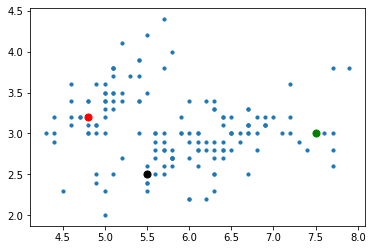

In [108]:
plt.scatter(myKmeans.feature_data[:,0],myKmeans.feature_data[:,1],s=10)#all row with first col,vice-ver
plt.scatter(myKmeans.centroids[:1,0],myKmeans.centroids[:1,1],s=50,c='r')#1 row of centroids,vice-ver
plt.scatter(myKmeans.centroids[1:2,0],myKmeans.centroids[1:2,1],s=50,c='k')#2row of centroids,vice-ver
plt.scatter(myKmeans.centroids[2:3,0],myKmeans.centroids[2:3,1],s=50,c='g')

In [109]:
closer_centroid = myKmeans.assign_data_to_centroid()

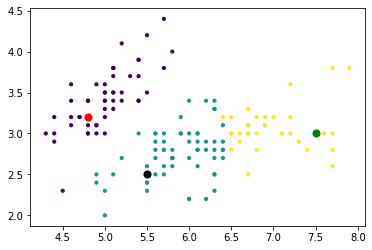

In [110]:
plt.scatter(feature_data[:,0], feature_data[:,1],s=10,c=closer_centroid)
plt.scatter(myKmeans.centroids[:1,0], myKmeans.centroids[:1,1], s=50, c='r')
plt.scatter(myKmeans.centroids[1:2,0], myKmeans.centroids[1:2,1], s=50, c='k')
plt.scatter(myKmeans.centroids[2:3,0], myKmeans.centroids[2:3,1], s=50, c='g')

In [112]:
myKmeans.my_cost()

88.60482492151777

* Current centroid

In [113]:
myKmeans.centroids

array([[4.8, 3.2],
       [5.5, 2.5],
       [7.5, 3. ]])

* Default centroids

In [114]:
myKmeans.recalculate_centroid()

In [115]:
closer_centroid = myKmeans.assign_data_to_centroid()

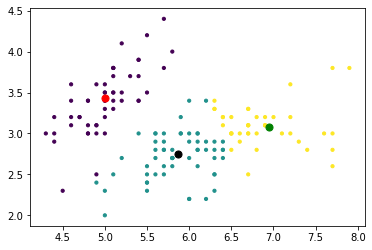

In [116]:
plt.scatter(myKmeans.feature_data[:,0], myKmeans.feature_data[:,1],s=10,c=closer_centroid)
plt.scatter(myKmeans.centroids[:1,0], myKmeans.centroids[:1,1], s=50, c='r')
plt.scatter(myKmeans.centroids[1:2,0], myKmeans.centroids[1:2,1], s=50, c='k')
plt.scatter(myKmeans.centroids[2:3,0], myKmeans.centroids[2:3,1], s=50, c='g')

In [117]:
myKmeans.my_cost()

64.12423865823158

In [118]:
myKmeans.recalculate_centroid()

In [119]:
myKmeans.centroids

array([[5.004, 3.41 ],
       [5.848, 2.719],
       [6.88 , 3.098]])